# Rats and their Best Pittsburgh Neighborhood

## Introduction

![rat](https://media.giphy.com/media/gOH54eiriYIwM/giphy.gif?cid=ecf05e4721irsuco1h9koez49cvisgvh029miipfcj2dr4v3&ep=v1_gifs_search&rid=giphy.gif&ct=g)

For our hunt to find the best Pittsburgh neighborhood, we wanted to get a bit more creative in deciding what our metrics would be. I came across some datasets about garbage and dumps, and thought it would be fun to look from a metric where a dump site is a positive for the neighborhood, leading us to come up with the perspective of a rat. A dataset about toxic releases gave us the short lived idea of a Teenage Mutant Ninja Turtles theme, but unfortunately there was not enough data about pizza place locations for it to go very far. So our final decision was look for the best place to live as a rat new to Pittsburgh.

## The Metric

We started with the dump data and went from there. We wanted to have both positive and negative metrics to measure by so we compiled a list of potential metrics and then sorted them out if not enough data was available or if it was badly labelled. A rat needs food, shelter, and safety, so our data had to reflect those needs. We landed on gardens, dump sites, and dogs to cover those three bases.

## Dump Sites

Our first submetric is the location of illegal dump sites. This is the perfect place for a rat to find shelter, or possibly even a meal. The best neighborhood would have the best real estate opportunities available for homeowners-to-be!

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from fpsnippets import zip_to_neighborhoods, ZIPS, NEIGHBORHOODS
from tqdm import tqdm
from collections import Counter

Neighborhood
Hazelwood           68
Perry South         53
Beltzhoover         47
Carrick             29
Greenfield          22
                    ..
Sharpsburg           1
Springdale           1
Southside Slopes     1
Banksville           1
West Wood            1
Name: count, Length: 79, dtype: int64


Text(0.5, 1.0, 'Dumps')

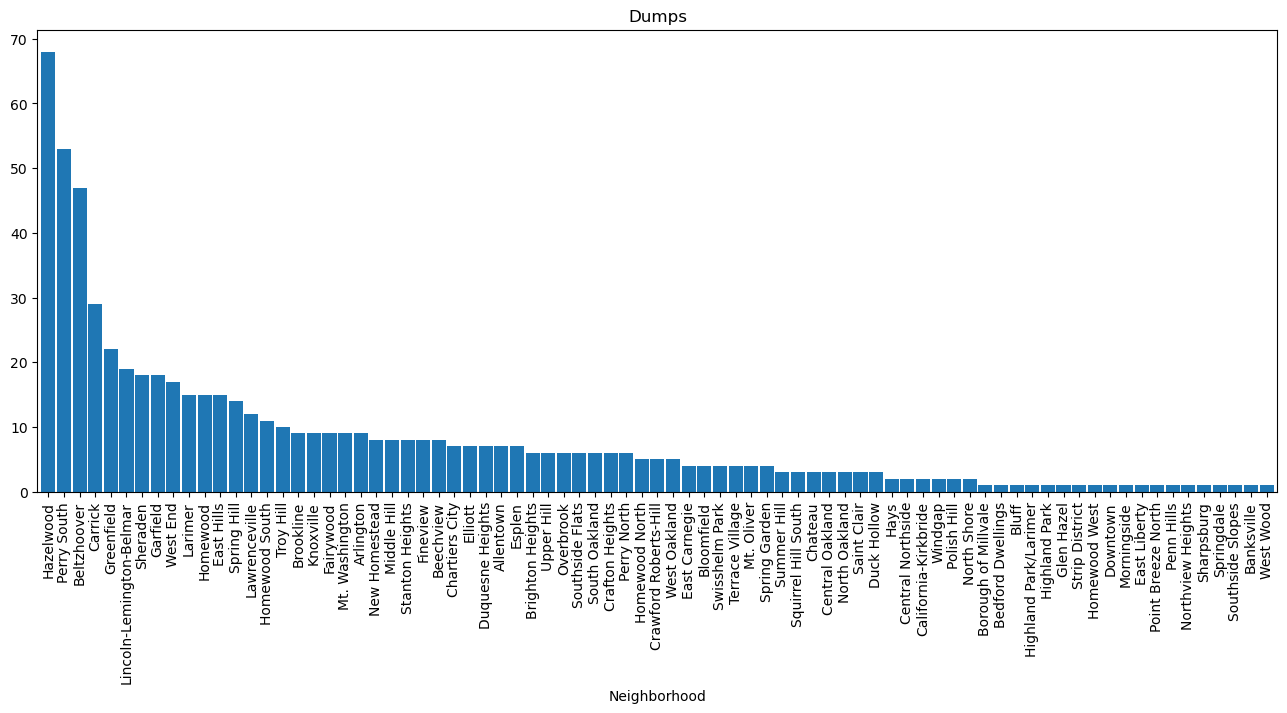

In [11]:
dump_csv="https://data.wprdc.org/dataset/ed4cf849-d323-4d01-8a13-675d283f1ac9/resource/ee834d8d-ae71-4b3b-b02b-312ba321ff17/download/illegaldumpsites.csv"
dump_data=pd.read_csv(dump_csv, encoding="latin1")
mask=dump_data['City']=='Pittsburgh'
pittdump=dump_data[mask]
#print(pitt)
neigh=pittdump["Neighborhood"].value_counts()
print(neigh)
neigh.plot(kind='bar',width=0.9, figsize=(16,6))
plt.title("Dumps")

#### That's a bit much to take in at once. Let's pull the top 15 of the set to get a less crowded look at things.

Neighborhood
Hazelwood                   68
Perry South                 53
Beltzhoover                 47
Carrick                     29
Greenfield                  22
Lincoln-Lemington-Belmar    19
Sheraden                    18
Garfield                    18
West End                    17
Larimer                     15
Homewood                    15
East Hills                  15
Spring Hill                 14
Lawrenceville               12
Homewood South              11
Name: count, dtype: int64


Text(0.5, 1.0, 'Dumps')

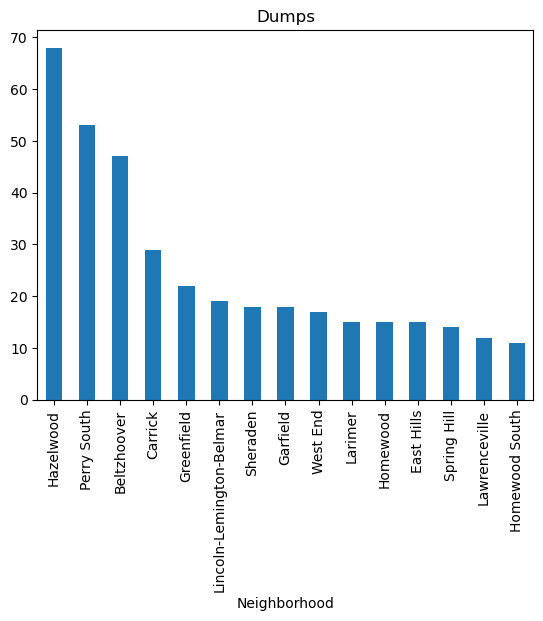

In [4]:
top=neigh.nlargest(15)
print(top)
top.plot(kind="bar")
plt.title("Dumps")

#### Much better! Another way to look at it is in pie form...

Text(0, 0.5, '')

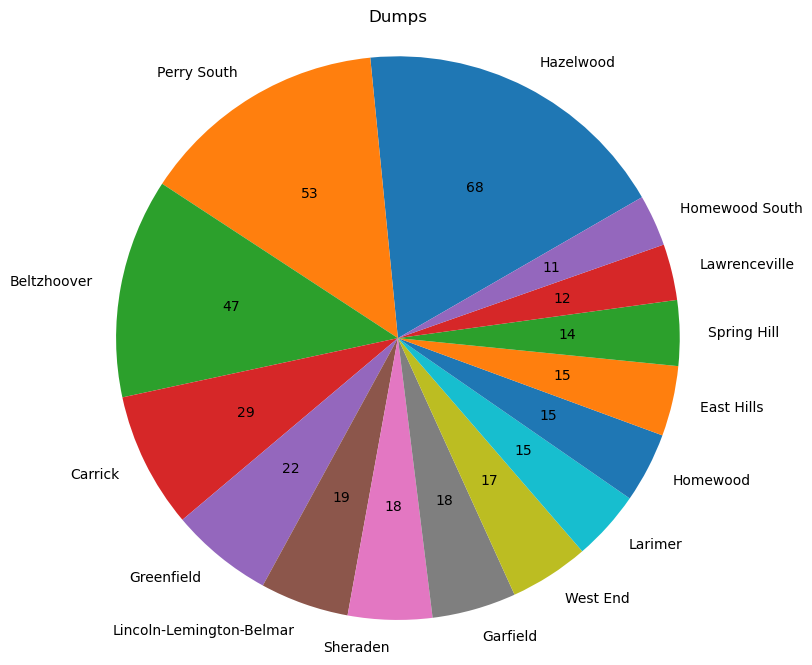

In [6]:
top.plot.pie(startangle=30, figsize=(8,8), autopct=lambda p: '{:.0f}'.format(p * sum(top) / 100))
plt.title("Dumps")
plt.axis("equal")
plt.ylabel("")

## Dump Winner

Looking at the data, we can see that Hazelwood takes the win with 68 illegal dumpsites available to make your new home! Perrywood takes second with 53 and Beltzhoover third with 47. Based off of this dataset, Hazelwood is the best neighborhood in Pittsburgh for a rat's choice of dwelling.

## Dogs

#### The first submetric takes into account the one of the biggest threats posed to rats: predators. We used data for Allegheny County Dog Licenses collected from the Western Pennsylvania Regional DataCenter to determine the best City of Pittsburgh neighborhood to live in as a rat according to our metrics.

#### First, let's go through the data and configure it for our needs. This data contains dogs from the entirety of Allegheny county, so we'll mask all entries that are not in the City of Pittsburgh. Additionally, the dogs' locations are organized with zip codes. Since we are looking for the best neighborhood, we'll also use helper functions to convert the zip codes into the neighborhood(s) they correspond with. 

In [5]:
tqdm.pandas(desc="Mapping ZIPs to neighborhoods")
dogs = pd.read_csv("Dogs.csv")

dogs['OwnerZip'] = dogs['OwnerZip'].astype(str)
ZIPS = ZIPS[ZIPS.geometry.intersects(NEIGHBORHOODS.union_all())]
pgh_zips = set(ZIPS["ZIP"].astype(str))

dogs = dogs[dogs['OwnerZip'].isin(pgh_zips)].copy()
dogs['neighborhoods'] = dogs['OwnerZip'].progress_apply(zip_to_neighborhoods)

all_neighborhoods = [n for sublist in dogs['neighborhoods'].dropna() for n in sublist]
neighborhood_counts = Counter(all_neighborhoods)
counts_df = pd.DataFrame(neighborhood_counts.items(), columns=['Neighborhood', 'DogCount'])
counts_df = counts_df.sort_values(by='DogCount', ascending=False)

print(counts_df)

Mapping ZIPs to neighborhoods: 100%|██████████| 22596/22596 [02:04<00:00, 181.73it/s]

                Neighborhood  DogCount
0                       Hays      6334
1   Lincoln-Lemington-Belmar      5234
4             Homewood North      3300
5                 East Hills      3282
10                 Overbrook      2783
..                       ...       ...
88     Central Lawrenceville        10
87           Central Oakland         9
83          Crawford-Roberts         8
79               Middle Hill         8
89       Upper Lawrenceville         6

[90 rows x 2 columns]


#### Now that we have a list of the number of dogs per neighborhood in the City of Pittsburgh, let's organize this data into a visual representation!

#### Here we have two graph representing the same data set. Since the first graph is so overcrowded as to be unreadable, we'll cut off the data set to the top twenty entries.

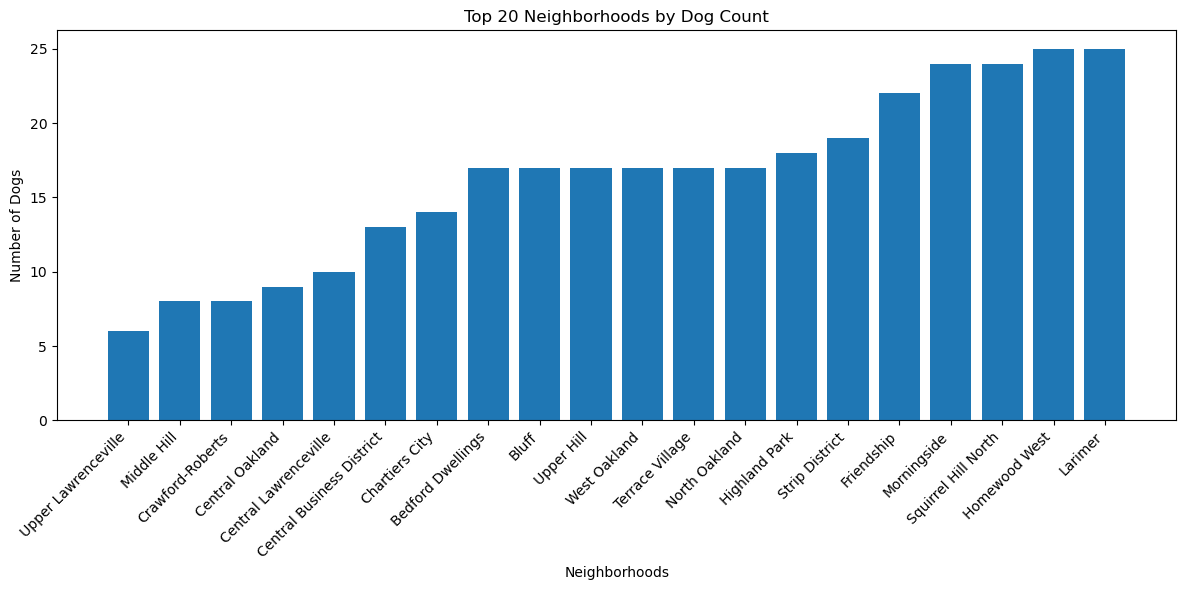

In [9]:
all_neiborhoods = [neiborhood for sublist in dogs['neighborhoods'].dropna() for neiborhood in sublist]
total_counts = Counter(all_neiborhoods)
total_df = pd.DataFrame(total_counts.items(), columns=['Neighborhood', 'DogCount']).sort_values(by='DogCount', ascending=True)

def plot_bar(df, xcol, ycol, title, xlabel='Neighborhoods', ylabel='Number of Dogs', top_n=None, rotation=45):
    plt.figure(figsize=(12, 6))
    plot_df = df if top_n is None else df.head(top_n)
    plt.bar(plot_df[xcol], plot_df[ycol])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.show()

plot_bar(total_df, 'Neighborhood', 'DogCount', 'Top 20 Neighborhoods by Dog Count', rotation=45, top_n=20)

#### Great! It looks like Upper Lawrenceville is the neighborhood with the lowest count of dogs. 

#### Let's dive further! While all dogs are a threat to rats, certain dog breeds pose significantly more of a danger than others since hunting instincts and avilities vary between breeds. Here, we'll organize the dog data between two categories: hunting and tracking dogs, and non hunting and tracking dogs. Now let's plot this information!

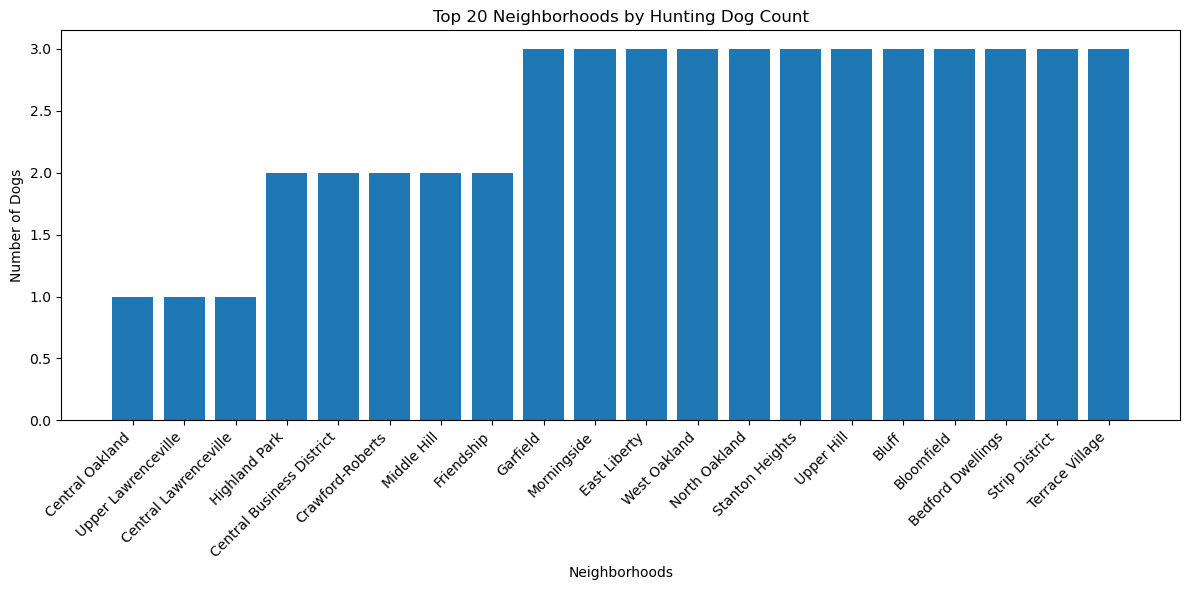

In [10]:
hunting_breeds = {
    'Beagle', 'Bloodhound', 'Coonhound', 'Pointer', 'Foxhound',
    'Weimaraner', 'Vizsla', 'Labrador Retriever', 'Golden Retriever',
    'German Shorthaired Pointer', 'Irish Setter', 'Bluetick Coonhound',
    'American Foxhound', 'Plott Hound', 'Treeing Walker Coonhound'
}

def assign_breed_weight(breed):
    if pd.isna(breed):
        return 1.0
    for hunter in hunting_breeds:
        if hunter.lower() in breed.lower():
            return 1.5  # Best hunters
    return 0.5  # Not hunting breeds

dogs['BreedWeight'] = dogs['Breed'].apply(assign_breed_weight)

hunting_counts = Counter()
for _, row in dogs.iterrows():
    if row['BreedWeight'] == 1.5 and isinstance(row['neighborhoods'], list):
        for neiborhood in row['neighborhoods']:
            hunting_counts[neiborhood] += 1

hunting_df = pd.DataFrame(hunting_counts.items(), columns=['Neighborhood', 'HuntingDogCount']).sort_values(by='HuntingDogCount', ascending=True)
plot_bar(hunting_df, 'Neighborhood', 'HuntingDogCount', 'Top 20 Neighborhoods by Hunting Dog Count', top_n=20)


#### Wow! Some things sure have shifted. Looks like Cetral Oakland is becoming more preferable.

#### This data is great, but has an issue. In this list, a neighood with a singular Beagle is considered more dangerous than a neighborhood with fifty Chihuahuas. We want an even comparison that takes into account both the number of dogs and the breeds of the dogs. Let's create a weight system for our data. Here, hunting and tracking dogs will be multiplied for a wight of 1.5 while non hunting or tracking dogs will be weighed with a weight of 0.5. This will give us a data set that takes into account both the number of dogs and the breed of dogs in each neighborhood.

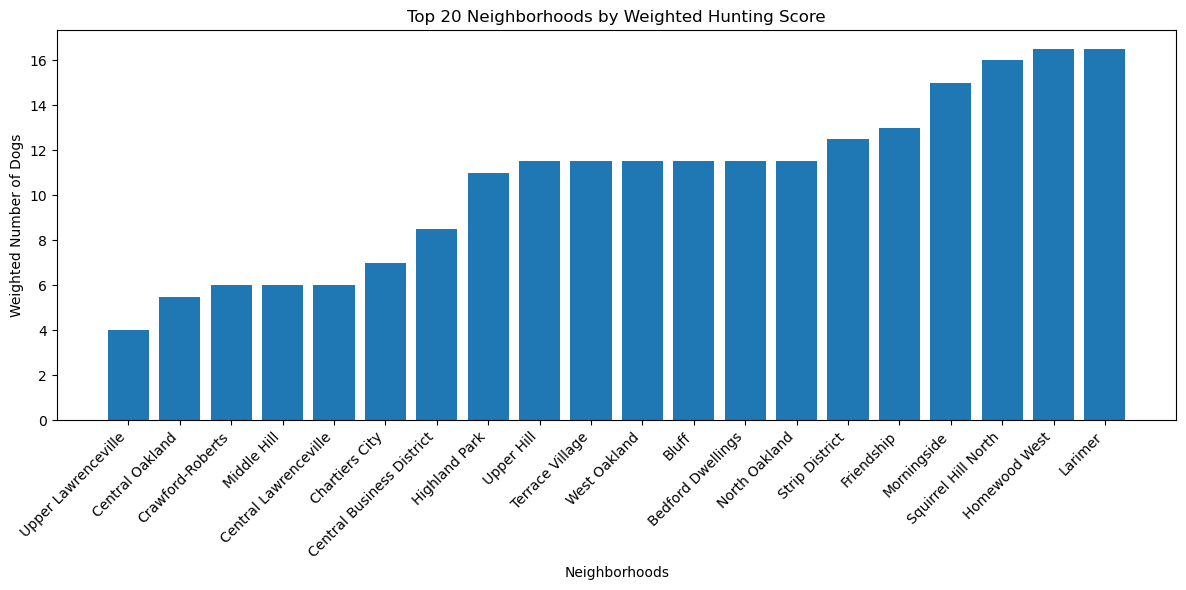

In [11]:
weighted_scores = Counter()
for _, row in dogs.iterrows():
    if isinstance(row['neighborhoods'], list):
        for neiborhood in row['neighborhoods']:
            weighted_scores[neiborhood] += row['BreedWeight']

weighted_df = pd.DataFrame(weighted_scores.items(), columns=['Neighborhood', 'WeightedScore']).sort_values(by='WeightedScore', ascending=True)

def plot_bar(df, xcol, ycol, title, xlabel='Neighborhoods', ylabel='Weighted Number of Dogs', top_n=None, rotation=45):
    plt.figure(figsize=(12, 6))
    plot_df = df if top_n is None else df.head(top_n)
    plt.bar(plot_df[xcol], plot_df[ycol])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.show()


plot_bar(weighted_df, 'Neighborhood', 'WeightedScore', 'Top 20 Neighborhoods by Weighted Hunting Score', top_n=20)


#### Now we have a list of the twenty neighborhoods in the City of Pittsburgh with the least number of non hunting or tracking breed dogs, the best case scenario for a rat looking to avoid predators!

#### Looks like Upper Lawrenceville is the best neighborhood for a rat looking to stay safe!!

## Garden

Trash is always a reliable source of food, but sometimes it can be nice to get a fresh meal. You can't purchase produce from your local farmers market, but what about scavenging your local food garden? This dataset looks at the locations of Grow Pittsburgh Food Gard in Allegheny County.

We'll use the same helper function from fpsnippets.py to convert the zip codes of the various public gardent to their corresponding City of Pittsburgh neighborhood while masking any entries not within Pittsburgh.

Mapping garden ZIPs to neighborhoods: 100%|██████████| 59/59 [00:00<00:00, 167.06it/s]


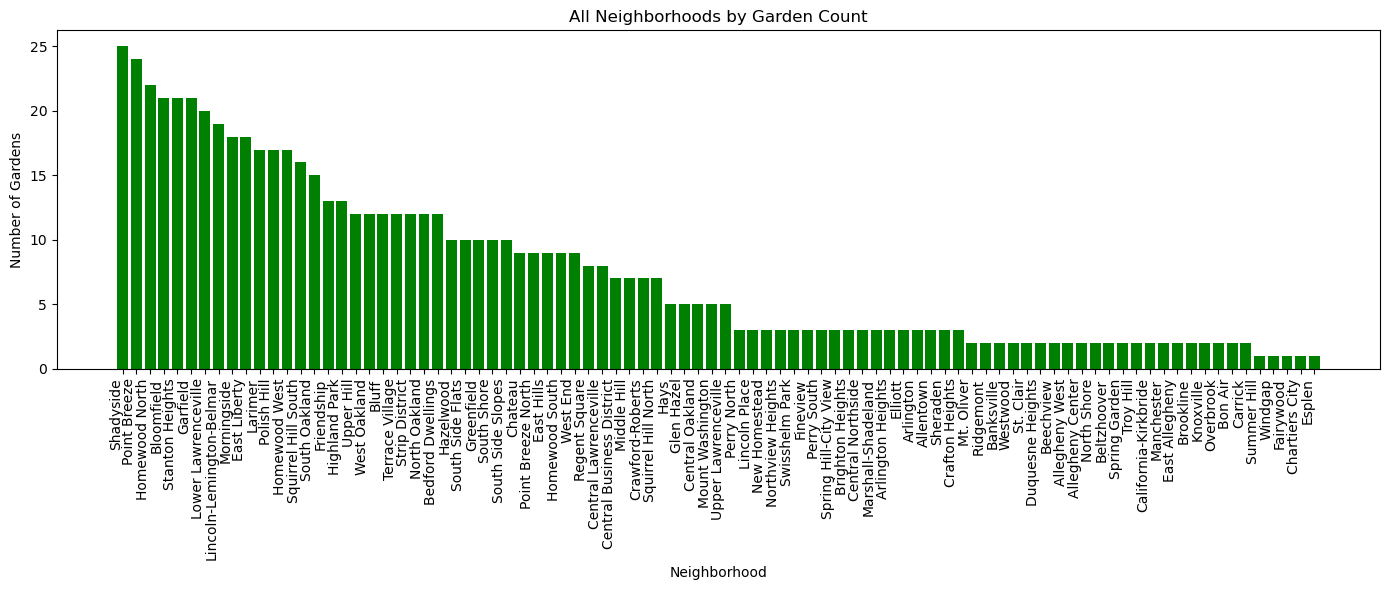

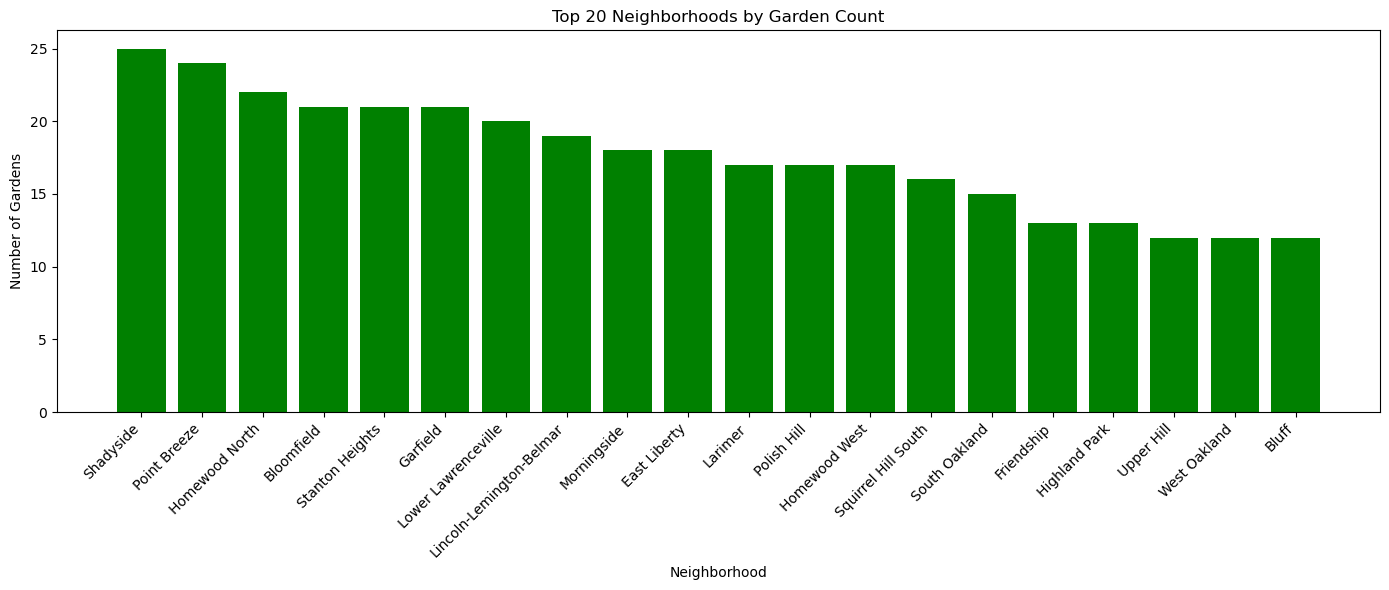

In [12]:
garden_csv = "https://data.wprdc.org/dataset/0d8c9708-3f01-48c4-adff-04d29825c9a2/resource/dbdfcb3e-8fa5-4468-9b05-f69562798f7a/download/grow-pgh-food-gardens.csv"
garden_data = pd.read_csv(garden_csv, encoding="latin1")
pitt = garden_data[garden_data['city'] == 'Pittsburgh'].copy()

pitt['zip_code'] = pitt['zip_code'].astype(str).str.slice(0, 5).str.strip()
ZIPS["ZIP"] = ZIPS["ZIP"].astype(str).str.slice(0, 5).str.strip()
ZIPS = ZIPS[ZIPS.geometry.intersects(NEIGHBORHOODS.geometry.union_all())]
pgh_zips = set(ZIPS["ZIP"])
pitt = pitt[pitt['zip_code'].isin(pgh_zips)].copy()

tqdm.pandas(desc="Mapping garden ZIPs to neighborhoods")
pitt['neighborhoods'] = pitt['zip_code'].progress_apply(zip_to_neighborhoods)

all_hoods = [n for sublist in pitt['neighborhoods'].dropna() for n in sublist]
garden_counts = Counter(all_hoods)

garden_df = pd.DataFrame(garden_counts.items(), columns=['Neighborhood', 'GardenCount'])
garden_df = garden_df.sort_values(by='GardenCount', ascending=False)

def plot_bar(df, xcol, ycol, title, xlabel='Neighborhood', ylabel='Number of Gardens', rotation=90, top_n=None):
    plt.figure(figsize=(14, 6))
    plot_df = df if top_n is None else df.head(top_n)
    plt.bar(plot_df[xcol], plot_df[ycol], color='green')  # <- green bars here
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.show()

plot_bar(
    garden_df,
    'Neighborhood',
    'GardenCount',
    title='All Neighborhoods by Garden Count',
    rotation=90
)

plot_bar(
    garden_df,
    'Neighborhood',
    'GardenCount',
    title='Top 20 Neighborhoods by Garden Count',
    rotation=45,
    top_n=20
)

Looks like Shadyside has twenty-five Grow Pittsburgh Food Gardens. A great place to be a rat looking for a healthy diet!

## Conclusion

Each of our neighborhoods has a different top choice, so we had to leave our overall top neighborhood up to our own discretion. The top 15 illegal dumpsite neighborhoods don't have as much overlap with the other two datasets, so we had to make a few sacrifices on that end. The winning neighborhood is present in all 3 datasets and their top 15 or 20 options. That neighborhood is... Lawrenceville! If you're a rat looking for a nice place to call home, Pittsburgh's Lawrenceville has a good amount of dump sites and gardens, and the smallest population of dangerous dogs around.

Chaney: I haven't done much exploring beyond Oakland, but I like to go to Homestead for it's movie theater. I can't imagine any of my favorite neighborhoods would be the best location for a rat, but maybe I just need to look at it from a different perspective.

Miko: As someone who lives in the pittsburgh area, I've always considered my favorite neighborhood to be the one I lived in: Franklin Park. However, from spending time around the city with friends, I can confidently say that Squirrel Hill would be my absolute favorite neighborhood. Squirrel Hill has the best food and drink that I have ever seen. While a rat may also enjoy the cuisine there, it will be much more difficult to obtain and the lack of dumped materials to make a home out of would make Squirrel Hill a sub-optimal choice